In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

# Path ke file zip di Google Drive
zip_path = '/content/drive/MyDrive/Datasets/brain-tumor.zip'
extract_path = '/content/drive/MyDrive/Datasets/brain_tumor_dataset'

# Ekstrak file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset berhasil diekstrak!")

Dataset berhasil diekstrak!


In [ ]:
!pip install ultralytics
from ultralytics import YOLO

In [ ]:
import os
import shutil

# Fungsi untuk menyalin file
def copy_files(src, dst):
    for file_name in os.listdir(src):
        file_path = os.path.join(src, file_name)
        if os.path.isfile(file_path):
            shutil.copy(file_path, dst)

# Gabungkan gambar ke folder 'train' dan 'val'
train_dirs = [
    '/content/drive/MyDrive/Datasets/brain_tumor_dataset/axial_t1wce_2_class/images/train',
    '/content/drive/MyDrive/Datasets/brain_tumor_dataset/coronal_t1wce_2_class/images/train',
    '/content/drive/MyDrive/Datasets/brain_tumor_dataset/sagittal_t1wce_2_class/images/train'
]

val_dirs = [
    '/content/drive/MyDrive/Datasets/brain_tumor_dataset/axial_t1wce_2_class/images/test',
    '/content/drive/MyDrive/Datasets/brain_tumor_dataset/coronal_t1wce_2_class/images/test',
    '/content/drive/MyDrive/Datasets/brain_tumor_dataset/sagittal_t1wce_2_class/images/test'
]

# Tentukan folder tujuan
train_dst = '/content/drive/MyDrive/Datasets/brain_tumor_dataset/images/train'
val_dst = '/content/drive/MyDrive/Datasets/brain_tumor_dataset/images/val'

# Membuat folder tujuan jika belum ada
os.makedirs(train_dst, exist_ok=True)
os.makedirs(val_dst, exist_ok=True)

# Salin file gambar ke folder yang sesuai
for dir in train_dirs:
    copy_files(dir, train_dst)

for dir in val_dirs:
    copy_files(dir, val_dst)

print("Gambar berhasil dipindahkan!")


Gambar berhasil dipindahkan!


In [ ]:
# # Buat file label untuk gambar .jpg di folder val
# val_images = [f for f in os.listdir(val_dst) if f.endswith('.jpg')]

# def create_label_file(image_name, output_folder):
#     # Format label: 'class x_center y_center width height' (koordinat normalisasi)
#     # Ini adalah contoh format yang diinginkan untuk YOLO. Pastikan untuk menyesuaikan berdasarkan dataset Anda.
#     label_name = image_name.replace('.jpg', '.txt')
#     label_path = os.path.join(output_folder, label_name)

#     # Membuat label dummy untuk semua gambar dalam folder val
#     with open(label_path, 'w') as file:
#         # Misal: 0 untuk tumor, 1 untuk non-tumor. Ini adalah placeholder, Anda harus menyesuaikan.
#         file.write("0 0.5 0.5 0.2 0.3\n")  # Format: class_id x_center y_center width height

# # Buat file label untuk setiap gambar di val
# for image_name in val_images:
#     create_label_file(image_name, val_dst)

# print("File gambar dan label berhasil dipindahkan dan dibuat di folder 'train' dan 'val'.")

import os

# Folder gambar
train_images_folder = '/content/drive/MyDrive/Datasets/brain_tumor_dataset/images/train'
val_images_folder = '/content/drive/MyDrive/Datasets/brain_tumor_dataset/images/val'

# Folder untuk label
train_labels_folder = '/content/drive/MyDrive/Datasets/brain_tumor_dataset/labels/train'
val_labels_folder = '/content/drive/MyDrive/Datasets/brain_tumor_dataset/labels/val'

# Membuat folder label jika belum ada
os.makedirs(train_labels_folder, exist_ok=True)
os.makedirs(val_labels_folder, exist_ok=True)

# Fungsi untuk membuat file label dummy
def create_label_file(image_name, label_folder):
    # Format label dummy: 'class_id x_center y_center width height'
    label_name = image_name.replace('.jpg', '.txt')  # Ubah nama gambar menjadi label
    label_path = os.path.join(label_folder, label_name)

    # Misalnya, kita menambahkan data dummy untuk kelas tumor (class_id 0)
    # Pastikan untuk menyesuaikan ini dengan data sebenarnya jika tersedia.
    with open(label_path, 'w') as f:
        f.write("0 0.5 0.5 0.2 0.3\n")  # Data dummy (misalnya: 0 untuk tumor, bounding box di tengah)

# Membuat label untuk setiap gambar di folder train
train_images = [f for f in os.listdir(train_images_folder) if f.endswith('.jpg')]
for image_name in train_images:
    create_label_file(image_name, train_labels_folder)

# Membuat label untuk setiap gambar di folder val
val_images = [f for f in os.listdir(val_images_folder) if f.endswith('.jpg')]
for image_name in val_images:
    create_label_file(image_name, val_labels_folder)

print("Label untuk gambar di folder 'train' dan 'val' berhasil dibuat!")

Label untuk gambar di folder 'train' dan 'val' berhasil dibuat!


In [ ]:
# Buat file YAML
yaml_path = '/content/drive/MyDrive/Datasets/data.yaml'
yaml_content = """
train: /content/drive/MyDrive/Datasets/brain_tumor_dataset/images/train
val: /content/drive/MyDrive/Datasets/brain_tumor_dataset/images/val

# Jumlah kelas
nc: 2

# Nama kelas
names: ['tumor', 'non-tumor']
"""
# Simpan file YAML
with open(yaml_path, "w") as file:
    file.write(yaml_content)

print(f"File YAML berhasil disimpan di: {yaml_path}")

File YAML berhasil disimpan di: /content/drive/MyDrive/Datasets/data.yaml


In [ ]:
# Buat model YOLOv8
model = YOLO('yolov8s.pt')  # Pilih model YOLOv8 (s: small, m: medium, l: large)

# Latih model
model.train(data='/content/drive/MyDrive/Datasets/data.yaml', epochs=50, imgsz=640, batch=16)


100%|██████████| 21.5M/21.5M [00:00<00:00, 142MB/s] 


Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Datasets/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

train: Scanning /content/drive/MyDrive/Datasets/brain_tumor_dataset/labels/train... 893 images, 0 backgrounds, 0 corrupt: 100%|██████████| 893/893 [00:10<00:00, 84.15it/s] 


train: New cache created: /content/drive/MyDrive/Datasets/brain_tumor_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Datasets/brain_tumor_dataset/labels/val... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:02<00:00, 80.50it/s]


val: New cache created: /content/drive/MyDrive/Datasets/brain_tumor_dataset/labels/val.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.494      3.747      2.304         17        640: 100%|██████████| 56/56 [09:55<00:00, 10.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:54<00:00,  7.73s/it]

                   all        223        223      0.125      0.247      0.102     0.0442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      2.166      2.698      2.138         24        640: 100%|██████████| 56/56 [09:48<00:00, 10.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:53<00:00,  7.60s/it]

                   all        223        223     0.0218      0.193    0.00916    0.00207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G       2.03       2.57      2.144         20        640: 100%|██████████| 56/56 [09:46<00:00, 10.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:51<00:00,  7.34s/it]

                   all        223        223      0.263      0.332      0.262     0.0558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      2.026      2.404      2.106         24        640: 100%|██████████| 56/56 [09:42<00:00, 10.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.16s/it]

                   all        223        223      0.169      0.148     0.0531     0.0194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.926      2.301      2.023         25        640: 100%|██████████| 56/56 [09:45<00:00, 10.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:53<00:00,  7.70s/it]

                   all        223        223      0.567      0.502      0.465      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.908       2.26       2.04         28        640: 100%|██████████| 56/56 [09:48<00:00, 10.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:53<00:00,  7.61s/it]

                   all        223        223      0.359       0.22      0.265     0.0498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.857      2.203      2.027         25        640: 100%|██████████| 56/56 [09:49<00:00, 10.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.23s/it]

                   all        223        223      0.364       0.57       0.39      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.811      2.088      1.966         25        640: 100%|██████████| 56/56 [09:46<00:00, 10.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:51<00:00,  7.29s/it]

                   all        223        223      0.754      0.318      0.482      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.794      2.142      1.927         22        640: 100%|██████████| 56/56 [09:45<00:00, 10.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.28s/it]

                   all        223        223       0.64      0.381      0.486       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G        1.8      2.065      1.925         32        640: 100%|██████████| 56/56 [09:45<00:00, 10.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.25s/it]

                   all        223        223      0.508      0.296      0.374      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.777      1.974      1.907         20        640: 100%|██████████| 56/56 [09:44<00:00, 10.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:52<00:00,  7.52s/it]

                   all        223        223      0.436      0.525      0.467       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.739      1.941      1.871         21        640: 100%|██████████| 56/56 [09:43<00:00, 10.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.25s/it]

                   all        223        223      0.708      0.556      0.644      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.701      1.859      1.806         21        640: 100%|██████████| 56/56 [09:44<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.18s/it]

                   all        223        223      0.551      0.453      0.571      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.673      1.866      1.833         19        640: 100%|██████████| 56/56 [09:47<00:00, 10.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.26s/it]

                   all        223        223      0.739      0.619      0.768       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.688      1.828      1.821         21        640: 100%|██████████| 56/56 [09:43<00:00, 10.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:53<00:00,  7.68s/it]

                   all        223        223      0.667      0.556      0.647      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.679      1.813      1.825         23        640: 100%|██████████| 56/56 [09:44<00:00, 10.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.24s/it]

                   all        223        223      0.622      0.556      0.596      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.644      1.809      1.801         29        640: 100%|██████████| 56/56 [09:42<00:00, 10.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.15s/it]

                   all        223        223      0.586      0.502      0.559      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.665      1.808      1.796         17        640: 100%|██████████| 56/56 [09:44<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:54<00:00,  7.75s/it]

                   all        223        223      0.635      0.543      0.669      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G       1.65      1.739      1.786         31        640: 100%|██████████| 56/56 [09:44<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.18s/it]

                   all        223        223      0.722      0.592      0.688      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.626      1.731      1.778         22        640: 100%|██████████| 56/56 [09:43<00:00, 10.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:54<00:00,  7.73s/it]

                   all        223        223      0.647      0.614      0.675      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.626      1.745      1.751         25        640: 100%|██████████| 56/56 [09:42<00:00, 10.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.26s/it]

                   all        223        223      0.705      0.713      0.721      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.597      1.662      1.734         23        640: 100%|██████████| 56/56 [09:43<00:00, 10.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:49<00:00,  7.09s/it]

                   all        223        223      0.685      0.556      0.554      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.605      1.625      1.736         22        640: 100%|██████████| 56/56 [09:41<00:00, 10.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:53<00:00,  7.59s/it]

                   all        223        223      0.732      0.475      0.606      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.567      1.635      1.726         24        640: 100%|██████████| 56/56 [09:44<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:51<00:00,  7.32s/it]

                   all        223        223        0.6      0.444      0.534      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.596      1.641      1.734         24        640: 100%|██████████| 56/56 [09:44<00:00, 10.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:52<00:00,  7.50s/it]

                   all        223        223      0.709      0.634      0.664      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.558      1.598      1.701         27        640: 100%|██████████| 56/56 [09:42<00:00, 10.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.19s/it]

                   all        223        223      0.753      0.686      0.713      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.592      1.566       1.72         19        640: 100%|██████████| 56/56 [09:43<00:00, 10.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:52<00:00,  7.45s/it]

                   all        223        223      0.647      0.668      0.696      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.545      1.563      1.693         25        640: 100%|██████████| 56/56 [09:45<00:00, 10.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:52<00:00,  7.51s/it]

                   all        223        223      0.756      0.673      0.706      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G       1.58      1.533       1.71         27        640: 100%|██████████| 56/56 [09:39<00:00, 10.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:52<00:00,  7.57s/it]

                   all        223        223      0.714       0.67      0.701      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.529      1.507      1.667         32        640: 100%|██████████| 56/56 [09:42<00:00, 10.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:53<00:00,  7.64s/it]

                   all        223        223      0.796      0.664      0.798       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.531      1.522      1.674         24        640: 100%|██████████| 56/56 [09:43<00:00, 10.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.27s/it]

                   all        223        223       0.61      0.653      0.642      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.511      1.428       1.64         29        640: 100%|██████████| 56/56 [09:44<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:52<00:00,  7.57s/it]

                   all        223        223      0.862      0.709      0.828      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.485      1.425      1.634         17        640: 100%|██████████| 56/56 [09:46<00:00, 10.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:52<00:00,  7.51s/it]

                   all        223        223      0.802       0.71      0.812      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G       1.46       1.38      1.623         22        640: 100%|██████████| 56/56 [09:44<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:49<00:00,  7.13s/it]

                   all        223        223      0.819      0.704      0.799      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G       1.44      1.349      1.588         27        640: 100%|██████████| 56/56 [09:44<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.17s/it]

                   all        223        223      0.802      0.727      0.811       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.481      1.386      1.651         16        640: 100%|██████████| 56/56 [09:41<00:00, 10.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:52<00:00,  7.44s/it]

                   all        223        223      0.669      0.571      0.635      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.454       1.39      1.612         25        640: 100%|██████████| 56/56 [09:42<00:00, 10.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:51<00:00,  7.42s/it]

                   all        223        223       0.72      0.722       0.76      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.437      1.319      1.602         21        640: 100%|██████████| 56/56 [09:42<00:00, 10.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.24s/it]

                   all        223        223      0.763      0.767      0.751      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.413      1.326      1.593         20        640: 100%|██████████| 56/56 [09:40<00:00, 10.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:49<00:00,  7.09s/it]

                   all        223        223      0.747      0.673      0.719      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.446      1.291      1.613         21        640: 100%|██████████| 56/56 [09:43<00:00, 10.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.17s/it]

                   all        223        223      0.691        0.7      0.658      0.259


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.215      1.043      1.607         13        640: 100%|██████████| 56/56 [09:40<00:00, 10.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.16s/it]

                   all        223        223      0.904      0.886      0.908      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.112     0.8485      1.519         13        640: 100%|██████████| 56/56 [09:40<00:00, 10.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:56<00:00,  8.04s/it]

                   all        223        223      0.978      0.933      0.967      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.006      0.783      1.441         13        640: 100%|██████████| 56/56 [09:36<00:00, 10.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:53<00:00,  7.68s/it]

                   all        223        223      0.958      0.928      0.972      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.9476     0.7199      1.401         13        640: 100%|██████████| 56/56 [09:38<00:00, 10.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.23s/it]

                   all        223        223      0.994      0.951      0.977      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.9595      0.703      1.412         13        640: 100%|██████████| 56/56 [09:44<00:00, 10.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:52<00:00,  7.43s/it]

                   all        223        223      0.992       0.96      0.983      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.9051     0.6608      1.364         13        640: 100%|██████████| 56/56 [09:41<00:00, 10.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:57<00:00,  8.17s/it]

                   all        223        223      0.982      0.956      0.985      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.8633     0.6228      1.344         13        640: 100%|██████████| 56/56 [09:42<00:00, 10.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:52<00:00,  7.52s/it]

                   all        223        223      0.987      0.955      0.987      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.8768      0.627      1.364         13        640: 100%|██████████| 56/56 [09:41<00:00, 10.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:52<00:00,  7.48s/it]

                   all        223        223      0.991      0.937      0.984      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.8054      0.587      1.308         13        640: 100%|██████████| 56/56 [09:40<00:00, 10.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:53<00:00,  7.69s/it]

                   all        223        223      0.986      0.959      0.985      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.7585     0.5632      1.267         13        640: 100%|██████████| 56/56 [09:41<00:00, 10.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:50<00:00,  7.25s/it]

                   all        223        223      0.982      0.968      0.988      0.678



50 epochs completed in 8.844 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:47<00:00,  6.83s/it]


                   all        223        223      0.982      0.968      0.988      0.678
                 tumor        223        223      0.982      0.968      0.988      0.678
Speed: 1.0ms preprocess, 198.1ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ac47ee43460>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
import os

# Cari file 'best.pt' di seluruh struktur direktori default
default_runs_path = '/content/runs/detect'
for root, dirs, files in os.walk(default_runs_path):
    if 'best.pt' in files:
        print(f"File 'best.pt' ditemukan di: {os.path.join(root, 'best.pt')}")


File 'best.pt' ditemukan di: /content/runs/detect/train/weights/best.pt
File 'best.pt' ditemukan di: /content/runs/detect/train2/weights/best.pt
File 'best.pt' ditemukan di: /content/runs/detect/train3/weights/best.pt



0: 640x640 2 tumors, 172.8ms
1: 640x640 1 tumor, 172.8ms
Speed: 3.3ms preprocess, 172.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict30


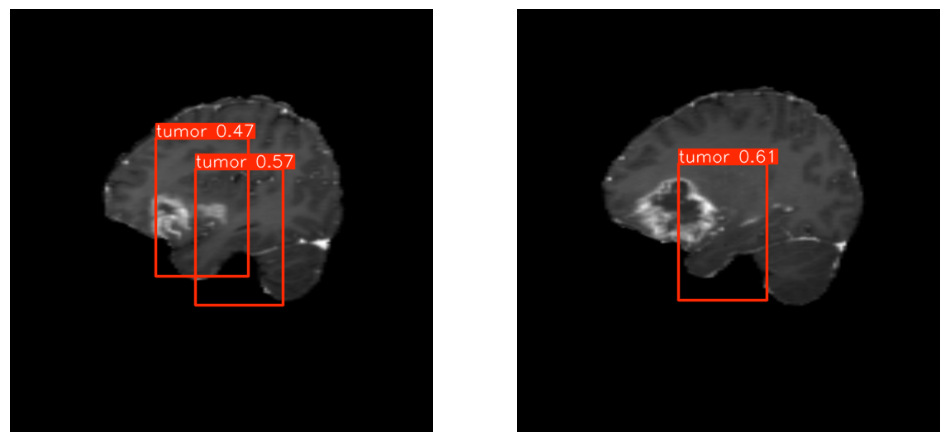

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# File model
model_path = '/content/runs/detect/train3/weights/best.pt'

# Gambar uji
test_images = [
    '/content/drive/MyDrive/Datasets/brain_tumor_dataset/images/val/00000_102.jpg',
    '/content/drive/MyDrive/Datasets/brain_tumor_dataset/images/val/00000_121.jpg',
]

# Muat model
model = YOLO(model_path)

# Prediksi gambar
results = model.predict(source=test_images, conf=0.25, save=True)

# Tampilkan hasil (bounding box dan label pada gambar)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Buat subplot 1 baris, 2 kolom

for i, result in enumerate(results):
    ax = axes[i]
    ax.imshow(result.plot())  # Menampilkan gambar dengan bounding box
    ax.axis('off')  # Menyembunyikan axis

plt.show()
